In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# def T(x, t):
#     if 0 <= t <= 5/12:
#         return 0.1 * x(12 * t / 5) - 5
#     elif 5/12 < t < 7/12:
#         return (t**2) * (36 * x(1)/5 + 36 * x(0)/5 - 144) + t * (-39 * x(1)/5 - 33 * x(0)/5 + 204) + ((21/10) * x(1) + (3/2) * x(0) - 65)
#     elif 7/12 <= t <= 1:
#         return 0.1 * x(12 * t / 5 - 7/5) + 5
#     else:
#         raise ValueError("t должно быть в диапазоне [0, 1]")


Итерация 1, eps = 3.0507176450369213
Итерация 2, eps = 1.5253222297924156
Итерация 3, eps = 0.7626940443874368
Итерация 4, eps = 0.38133055744810385
Итерация 5, eps = 0.1905929749457087
Итерация 6, eps = 0.09530125122800026
Итерация 7, eps = 0.04763739826735347
Итерация 8, eps = 0.023821420770079094
Итерация 9, eps = 0.011915522803932266
Итерация 10, eps = 0.005955707094433826
Итерация 11, eps = 0.00297561764510057
Итерация 12, eps = 0.001488749170059922
Итерация 13, eps = 0.000744438463131214
Итерация 14, eps = 0.000372139002784877
Итерация 15, eps = 0.00018602506089404613


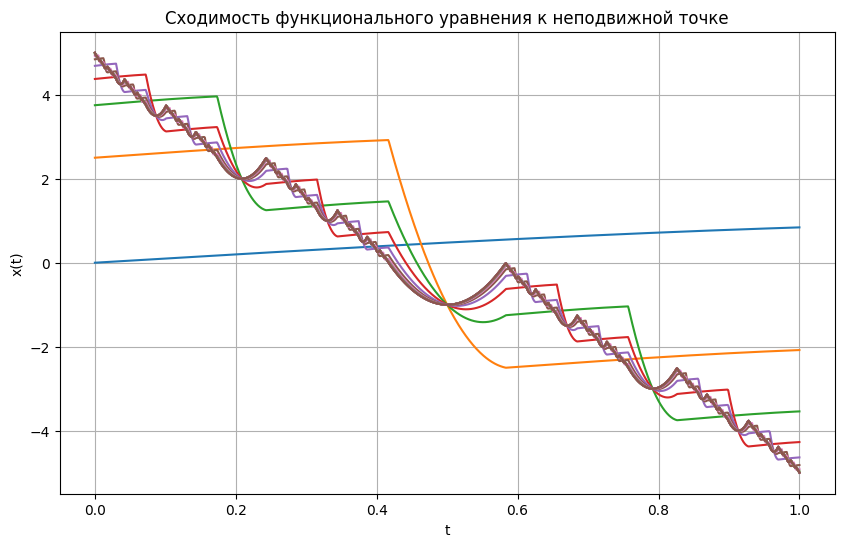

In [51]:
def T(x, t):
    if 0 <= t <= 5/12:
        return 0.5 * x(12 * t / 5) + 5/2
    elif 5/12 < t < 7/12:
        return (t**2) * (36 * x(1) + 36 * x(0) + 144) + t * (-39 * x(1) - 33 * x(0) - 174) + ((21/2) * x(1) + (15/2) * x(0) + 100/2)
    elif 7/12 <= t <= 1:
        return 0.5 * x(12 * t / 5 - 7/5) - 5/2
    else:
        raise ValueError("t должно быть в диапазоне [0, 1]")

def iterate_T(x, t, iterations):
    for _ in range(iterations):
        x = lambda t, x=x: T(x, t)
    return x

initial_function = lambda t: np.sin(t)
iterations = 15
t_values = np.linspace(0, 1, 1000)
y_values_old = [initial_function(elem) for elem in t_values]


plt.figure(figsize=(10, 6))
for i in range(1, iterations + 1):
    if i == 1:
        plt.plot(t_values, y_values_old)
        pass
    x_iter = iterate_T(initial_function, t_values, i)
    y_values_new = np.array([x_iter(t) for t in t_values])
    epsilon = np.max(np.abs(y_values_new - y_values_old))
    y_values_old = y_values_new
    # if i == (iterations):
    plt.plot(t_values, y_values_new)
    print(f'Итерация {i}, eps = {epsilon}')
    # plt.plot([1/2]*100, np.linspace(-2,10, 100))
    # plt.plot(np.linspace(0,1, 100), [-1]*100)

plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Сходимость функционального уравнения к неподвижной точке')
# plt.legend()
plt.grid(True)
plt.show()

In [59]:
def T(x, t):
    if 0 <= t <= 5/12:
        return 0.5 * x(12 * t / 5) + 5/2
    elif 5/12 < t < 7/12:
        return (t**2) * (36 * x(1) + 36 * x(0) + 144) + t * (-39 * x(1) - 33 * x(0) - 174) + ((21/2) * x(1) + (15/2) * x(0) + 30/2)
    elif 7/12 <= t <= 1:
        return 0.5 * x(12 * t / 5 - 7/5) - 5/2
    else:
        raise ValueError("t должно быть в интервале [0, 1]")

In [64]:
def T(x, t):
    if 0 <= t <= 5/12:
        return 0.1 * x(12 * t / 5) - 5
    elif 5/12 < t < 7/12:
        return (t**2) * (36 * x(1)/5 + 36 * x(0)/5 - 144) + t * (-39 * x(1)/5 - 33 * x(0)/5 + 204) + ((21/10) * x(1) + (3/2) * x(0) - 65)
    elif 7/12 <= t <= 1:
        return 0.1 * x(12 * t / 5 - 7/5) + 5
    else:
        raise ValueError("t должно быть в диапазоне [0, 1]")

In [65]:
def lipschitz_constant(x1, x2, t_values):
    differences_T = np.array([T(x1, t) - T(x2, t) for t in t_values])
    differences_x = np.array([x1(t) - x2(t) for t in t_values])
    
    norm_T = np.linalg.norm(differences_T, ord=np.inf)
    norm_x = np.linalg.norm(differences_x, ord=np.inf)
    
    if norm_x == 0:
        return 0
    else:
        return norm_T / norm_x

t_values = np.linspace(0, 1, 1000)

x1 = lambda t: np.sin(2 * np.pi * t)
x2 = lambda t: np.cos(2 * np.pi * t)

L = lipschitz_constant(x1, x2, t_values)
print(f"Оценка константы Липшица: {L}")

Оценка константы Липшица: 0.10000001977875123


In [140]:

def foo1():
    def foo2():
        string = "inside foo2"
    def foo3():
        nonlocal string
        string = "inside foo3"
    def foo4():
        global string
        string = "inside foo4"

    string = 'inside foo1'
    print("string inside foo1", string)
    foo2()
    print("string after foo2", string)
    foo3()
    print("string after foo3", string)
    foo4()
    print("string after foo4", string)

foo1()
print("string after all", string)

    

string inside foo1 inside foo1
string after foo2 inside foo1
string after foo3 inside foo3
string after foo4 inside foo3
string after all inside foo4
